In [46]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [47]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

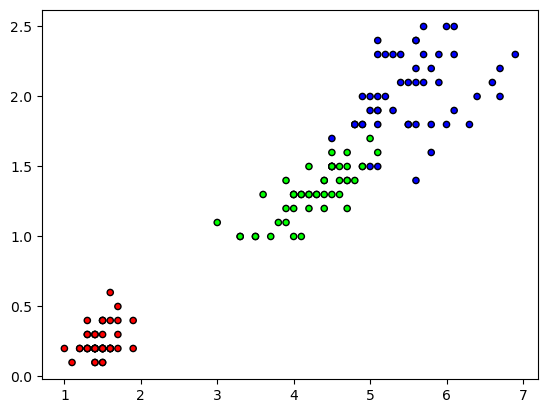

In [49]:
plt.figure()
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

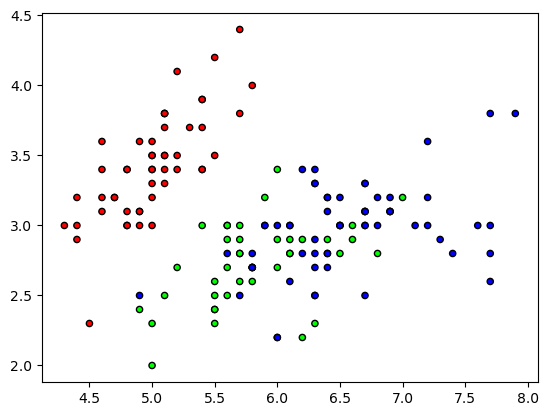

In [50]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [51]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(x1 - x2)**2)

class KNN:
    def __init__(self, k=3):
        self.k= k
        self.X_train = None
        self.y_train = None
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
        
    def _predict(self, x):
        # Compute the distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get k-nearest samples
        k_indices = np.argsort(distances)[0:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # majority vote
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        return most_common

In [52]:
clf = KNN(k=3)
clf.fit(X_train, y_train)

In [53]:
predictions = clf.predict(X_test)

In [54]:
acc = accuracy_score(y_test, predictions)

In [55]:
acc

0.9333333333333333